In [1]:
import matplotlib
# %matplotlib inline
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
import matplotlib.pyplot as plt

import SUITPy as suit
import surfAnalysisPy as sa
import nibabel as nb
import nitools as nt

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am

import selective_recruitment.plotting as splotting
import selective_recruitment.scripts.script_overlap_map_wm as soverlap
import selective_recruitment.plotting as splotting
import selective_recruitment.globals as gl

from statsmodels.stats.anova import AnovaRM # perform F test
from matplotlib.colors import LinearSegmentedColormap
from nilearn import plotting
from pathlib import Path

In [2]:
# setting working directory
# wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/Demand/selective_recruit'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/srv/diedrichsen/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Users/jdiedrichsen/Data/wm_cerebellum/selective_recruit'

## reliabilities of encoding and retrieval effects


In [3]:
# df0 = soverlap.get_enc_ret_rel_summ(subj = None, 
#                                     smooth = 3, 
#                                     subtract_mean = True, 
#                                     atlas_spaces = ["SUIT3", "fs32k"],
#                                     recall_dirs = [None, 0, 1], 
#                                     type = "CondHalf", 
#                                     ses_id = "ses-02", 
#                                     verbose = False)
# # save the dataframe
# df0.to_csv(wkdir + '/rel_enc_ret.tsv',sep='\t')

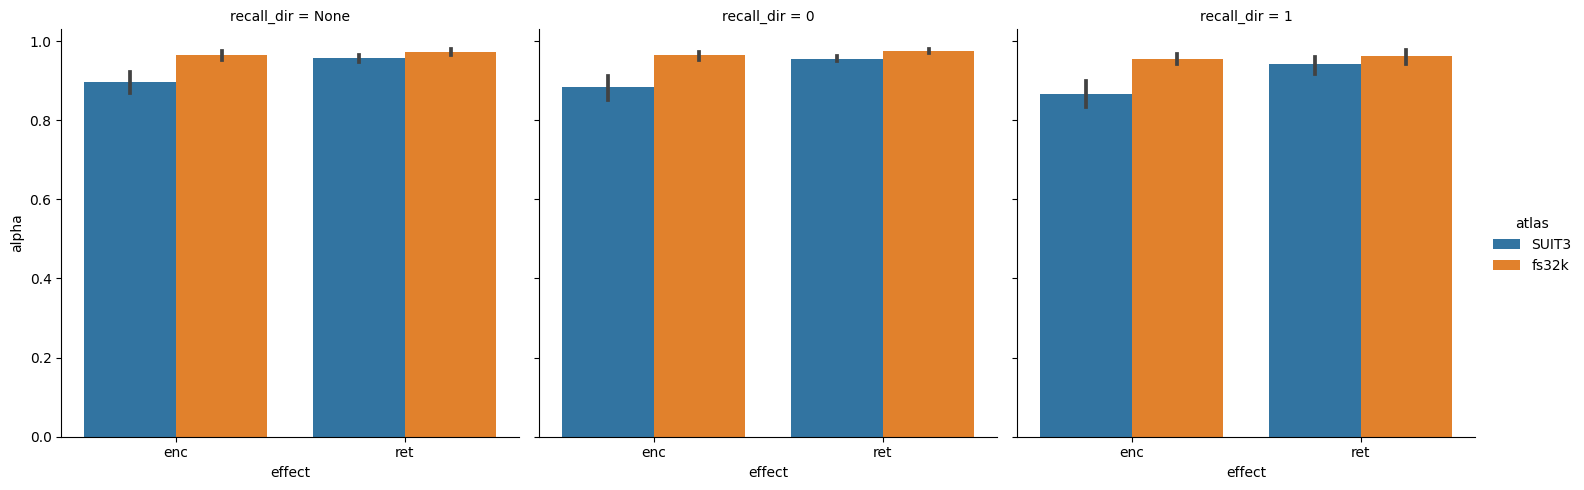

In [4]:
df0 = pd.read_csv(wkdir + '/rel_enc_ret.tsv',sep='\t')
sns.catplot(data = df0, x = "effect", y = "alpha", hue = "atlas", col = "recall_dir", kind = "bar")

## reliabilities of dir and load effects

In [5]:
# df1 = soverlap.get_dir_load_rel_summ(subj = None, 
#                                     smooth = 3, 
#                                     subtract_mean = True, 
#                                     atlas_spaces = ["SUIT3", "fs32k"],
#                                     type = "CondHalf", 
#                                     ses_id = "ses-02", 
#                                     verbose = False)
# # save the dataframe
# df1.to_csv(wkdir + '/rel_dir_load.tsv',sep='\t')

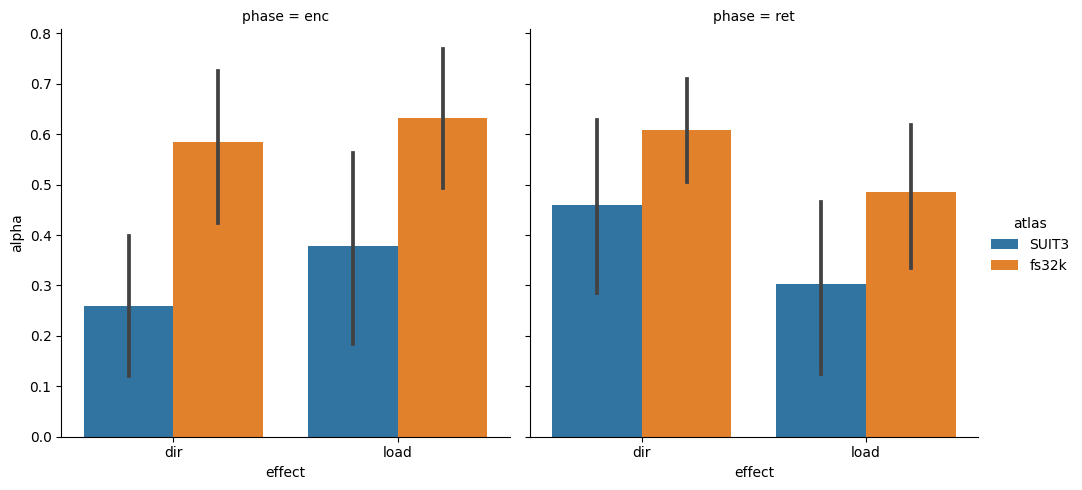

In [6]:
df1 = pd.read_csv(wkdir + '/rel_dir_load.tsv',sep='\t')
sns.catplot(data = df1, x = "effect", y = "alpha", col = "phase", hue = "atlas", kind = "bar")

## overlap (corr) between encoding and retrieval effects (not normalized)

In [7]:
# df2 = soverlap.get_enc_ret_overlap_summ(subj = None, 
#                                     smooth = 3, 
#                                     subtract_mean = True, 
#                                     atlas_spaces = ["SUIT3", "fs32k"],
#                                     recall_dirs = [None, 0, 1], 
#                                     type = "CondHalf", 
#                                     ses_id = "ses-02", 
#                                     verbose = False)
# # save the dataframe
# df2.to_csv(wkdir + '/overlap_enc_ret.tsv',sep='\t')

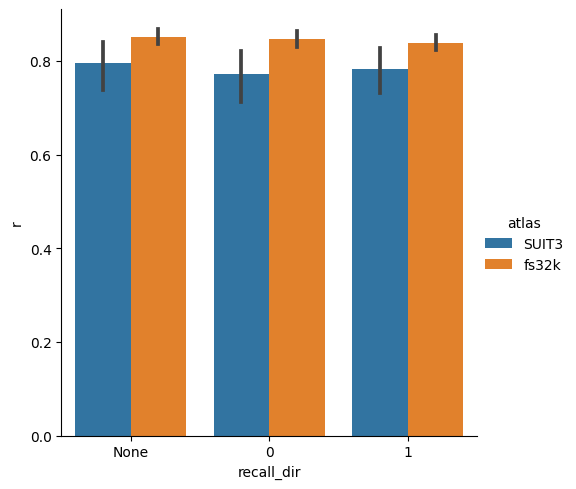

In [9]:
df2 = pd.read_csv(wkdir + '/overlap_enc_ret.tsv',sep='\t')
sns.catplot(data = df2, x = "recall_dir", y = "r", hue = "atlas", kind = "bar")

## overlap (corr) between encoding and retrieval effects (normalized)
- devided by the geometric mean of reliability values


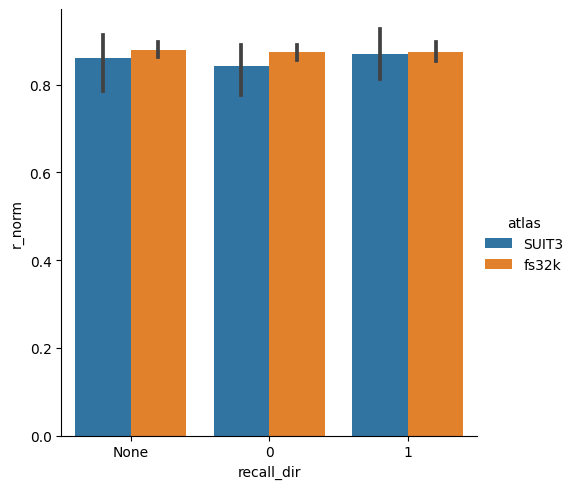

In [24]:
df0_enc = df0.loc[df0.phase == "enc"]
df0_ret = df0.loc[df0.phase == "ret"]

df2["ceil"] = np.sqrt(df0_enc["alpha"].values * df0_ret["alpha"].values)
df2["r_norm"] = df2["r"].values/df2["ceil"].values
sns.catplot(data = df2, x = "recall_dir", y = "r_norm", hue = "atlas", kind = "bar")

## overlap (corr) between dir and load effects (not normalized)

In [11]:
# df3 = soverlap.get_dir_load_overlap_summ(subj = None, 
#                                         smooth = 3, 
#                                         subtract_mean = True, 
#                                         atlas_spaces = ["SUIT3", "fs32k"],
#                                         type = "CondHalf", 
#                                         ses_id = "ses-02", 
#                                         verbose = False)
# # save the dataframe
# df3.to_csv(wkdir + '/overlap_dir_load.tsv',sep='\t')

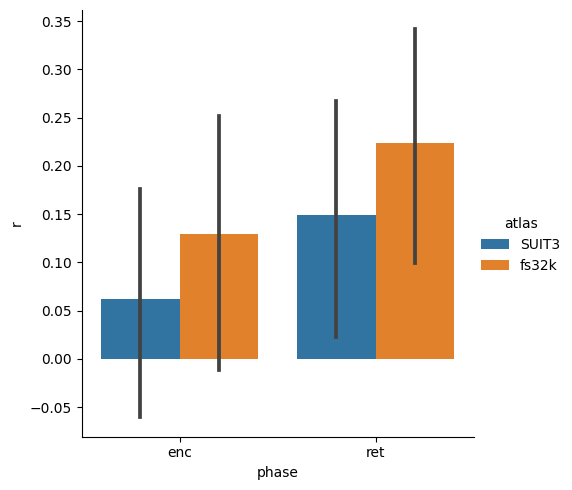

In [15]:
df3 = pd.read_csv(wkdir + '/overlap_dir_load.tsv',sep='\t')
sns.catplot(data = df3, x = "phase", y = "r", hue = "atlas", kind = "bar")

## overlap (corr) between dir and load effects (normalized)

/tmp/ipykernel_343816/3056069596.py:5: RuntimeWarning: invalid value encountered in sqrt
  df3["ceil"] = np.sqrt(df3["ceil2"].values)


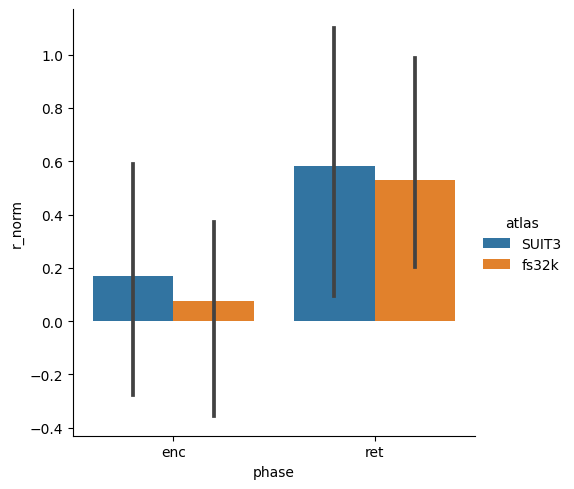

In [36]:
df1_dir = df1.loc[df1.effect == "dir"]
df1_load = df1.loc[df1.effect == "load"]

df3["ceil2"] = df1_dir["alpha"].values * df1_load["alpha"].values
df3["ceil"] = np.sqrt(df3["ceil2"].values)
df3["r_norm"] = df3["r"].values/df3["ceil"].values
sns.catplot(data = df3, x = "phase", y = "r_norm", hue = "atlas", kind = "bar")